# **Intro ML by Guilherme Silveira**

## **Aula 3 - Um projeto de baixa dimensionalidade e o baseline**

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.10


In [2]:
# Imports
# Se necessário instalar o seaborn: !pip install seaborn==0.9.0
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

### **Testando em duas dimensões**

In [3]:
# Lendo o arquivo .csv com os dados da internet
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
# Renomeando as colunas para pt
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [5]:
# Criando a coluna finalizado para melhor entendimento
# da coluna nao_finalizado
troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

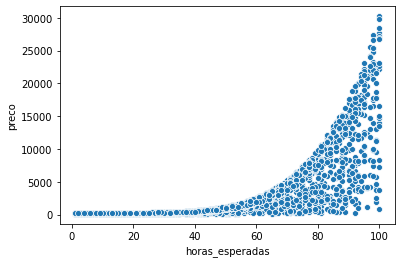

In [6]:
sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

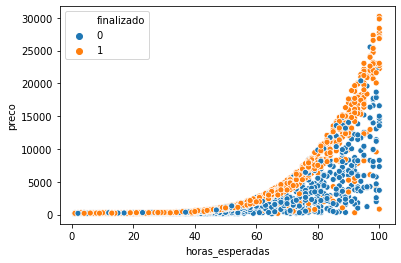

In [7]:
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

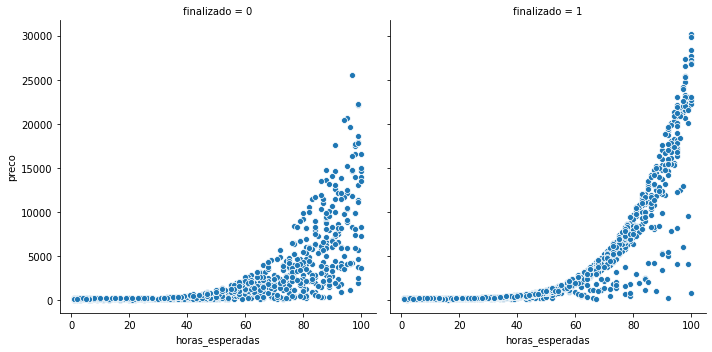

In [8]:
sns.relplot(x="horas_esperadas", y="preco", col="finalizado", data=dados)

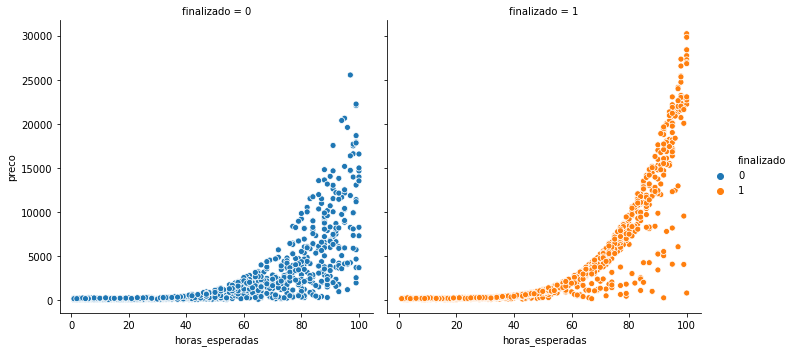

In [9]:
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)

In [10]:
# Separando os dados
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [11]:
# Valor de início
SEED = 20

# Separando os dados para o modelo
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos." % (len(treino_x), len(teste_x)))

# Escolhendo o modelo
modelo = LinearSVC()
# Treinando
modelo.fit(treino_x, treino_y)
# Prevendo
previsoes = modelo.predict(teste_x)

# Validando a acurácia do modelo
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%." % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos.
A acurácia foi 52.59%.


/home/ana/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [12]:
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print("A acurácia do algoritmo de baseline foi %.2f%%." % acuracia)

A acurácia do algoritmo de baseline foi 52.59%.


### **Curva de decisão**

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

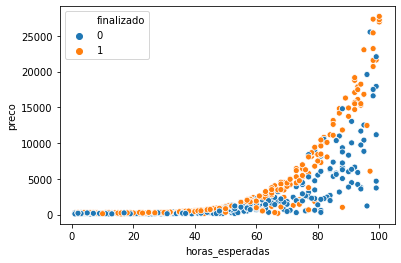

In [13]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x)

In [14]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min,x_max,y_min,y_max)

1 100 101 27738


In [15]:
# Definindo variáveis para criar o grid
pixels = 100
eixo_x = np.arange(x_min,x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min,y_max, (y_max - y_min) / pixels)

In [16]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [17]:
# Prever para todos os pontos
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

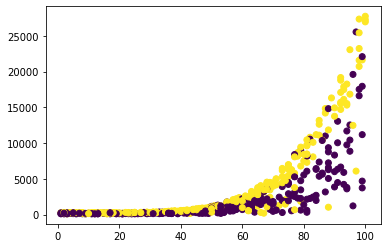

In [18]:
import matplotlib.pyplot as plt

plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y)

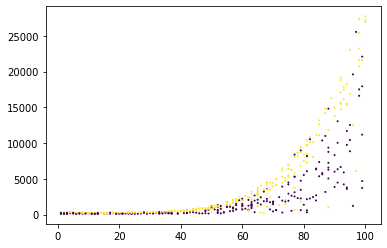

In [19]:
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

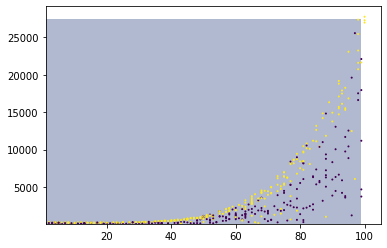

In [20]:
# Plotando o contorno da classificação usando os pixels
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

# Curva de decisão conhecida como Decision Boundary

## **Aula 4 - Support Vector Machine e a não linearidade**

## **Aula 5 - Classificadores Dummy e Árvore de Decisão**